# Chapter 6. 일반선형모델

## 6.5 푸아송 회귀

* 확률분포: 푸아송 분포
* 링크함수: 로그함수


### 6.5.3 분석준비

In [1]:
# 수치 계산에 사용하는 라이브러리
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats

# 그래프를 그리기 위한 라이브러리
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

# 통계모델을 추정하는 데 사용하는 라이브러리
import statsmodels.formula.api as smf
import statsmodels.api as sm

# 표시자릿수 지정
%precision 3
# 그래프를 주피터 노트북에 그리기 위한 설정
%matplotlib inline


In [2]:
# 데이터 읽어 들이기
beer = pd.read_csv("6-5-1-poisson-regression.csv")
print(beer.head(3))

   beer_number  temperature
0            6         17.5
1           11         26.6
2            2          5.0


### 6.5.4 푸아송 회귀(실습)

In [6]:
# 모델링
mod_pois = smf.glm("beer_number ~ temperature", beer, 
                   family=sm.families.Poisson()).fit()
mod_pois.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:            beer_number   No. Observations:                   30
Model:                            GLM   Df Residuals:                       28
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -57.672
Date:                Sun, 14 Jun 2020   Deviance:                       5.1373
Time:                        13:31:27   Pearson chi2:                     5.40
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.4476      0.199      2.253      0.024       0.058       0.837
temperature     0.0761      0.008      9.784      0.000       0.061       0.091
===============================================================================
"""

기온의 계수(coef): 0.0761  
기온의 계수가 양의 값이므로, 기온이 오르면 판매개수가 늘어날 것임

### 6.5.5 모델 선택

In [7]:
# Null모델
mod_pois_null = smf.glm(
    "beer_number ~ 1", data = beer, 
    family=sm.families.Poisson()).fit()

In [8]:
# AIC 비교
print("Null모델　　：", mod_pois_null.aic.round(3))
print("변수가 있는 모델：", mod_pois.aic.round(3))

Null모델　　： 223.363
변수가 있는 모델： 119.343


변수가 있는 모델의 AIC가 작으므로, 기온 독립변수는 필요함

### 6.5.6 회귀곡선 그래프

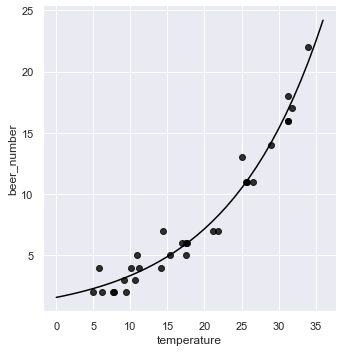

In [9]:
# 예측값 작성 
x_plot = np.arange(0, 37)
pred = mod_pois.predict(
    pd.DataFrame({"temperature": x_plot}))

# 회귀곡선을 그리지 않은 lmplot
sns.lmplot(y="beer_number", x = "temperature", 
           data = beer, fit_reg = False,
          scatter_kws = {"color":"black"})
# 회귀곡선을 덧그리기
plt.plot(x_plot, pred, color="black")

### 6.5.7 회귀계수 해석

In [10]:
# 기온이 1도일 때의 판매 개수의 기댓값
exp_val_1 = pd.DataFrame({"temperature": [1]})
pred_1 = mod_pois.predict(exp_val_1)

# 기온이 2도일 때의 판매 개수의 기댓값
exp_val_2 = pd.DataFrame({"temperature": [2]})
pred_2 = mod_pois.predict(exp_val_2)

# 기온이 1도에서 1도 오르면 판매 개수는 몇 배가 되는지
pred_2 / pred_1

0    1.079045
dtype: float64

In [10]:
# 회귀계수에 exp를 취한값과 동일
sp.exp(mod_pois.params["temperature"])

1.079